## Extracting Chess Squares with Square Filling Algorithm ( image --> fen format)

IDEA: 2 passaggi
- rough contorno della scacchiera
- rifinimento

nella prima parte effetuiamo bilateralFilter, canny e troviamo i contours che soddisfano una certa grandezza rispetto all'immagine, chiamiamoli candidati

per ogni candidato si proietta il contorno trovato in modo da "avere linee dritte", hough con filtro per trovare linee verticali o orrizzontali

dopo di che vengono trovati i quadrati e trovato l'approssimazione del contour come nel metodo precedente.


il candidato migliore é considerato quello che é piú quadrato e centrato nell'immagine


VINCOLI:
- tutte le edges della scacchiera devono avere buon contrasto con il background
- la scacchiera deve essere verso il centro dell'immagine

PRO:
- no ML
- in confronto ad approcci precedenti prende due stadi in cui trova candidati e poi usa la proiezione omografica per capire dove siano gli angoli della scacchiera con maggiore precisione


ESTENSIONI PER PRECISIONE:
- square filling ?


### NOTA
i parametri effettivi non sono esattatamente quelli usati nella versione finale, ma il processo é lo stesso

<br>

## Necessary Libraries

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import  math


In [10]:
def sort_quadrilateral_approx(approx):
    '''
    returns (bottomright(1), topright(2) , topleft(3) , bottomleft(4))
    '''

    # create same pattern for points , bottomright(1) , topright(2) , topleft(3) , bottomleft(4)
    index_sorted = sorted(approx, key=lambda x: x[0], reverse=True)
    #  Y values
    if index_sorted[0][1]< index_sorted[1][1]:
        index_sorted[0], index_sorted[1] = index_sorted[1], index_sorted[0]

    if index_sorted[2][1]> index_sorted[3][1]:
        index_sorted[2], index_sorted[3] = index_sorted[3], index_sorted[2]

    # bottomright(1) , topright(2) , topleft(3) , bottomleft(4)
    return (index_sorted[0], index_sorted[1], index_sorted[2], index_sorted[3])

In [11]:
image_path =  r"E:\projects\uni\Chessy3D\data\chessred\images\0\G000_IMG004.jpg"
image_path = r"C:\Users\Alessandro\Downloads\Immagine WhatsApp 2025-06-01 ore 22.59.14_ef4809cb.jpg"
image_path = r"C:\Users\Alessandro\Downloads\Immagine WhatsApp 2025-06-01 ore 22.59.14_5b4da136.jpg"
image_path = r"C:\Users\Alessandro\Downloads\Dynamic-Chess-Board-Piece-Extraction-master\Dynamic-Chess-Board-Piece-Extraction-master\test-images\test-8.jpeg"
image_path = r"C:\Users\Alessandro\Downloads\Dynamic-Chess-Board-Piece-Extraction-master\Dynamic-Chess-Board-Piece-Extraction-master\test-images\test-15.jpeg"
# image_path =  r"E:\projects\uni\Chessy3D\data\chessred\images\38\G038_IMG099.jpg" # troppo inclinata
# image_path =  r"E:\projects\uni\Chessy3D\data\chessred\images\41\G041_IMG019.jpg" # troppo inclinata
image_path =  r"E:\projects\uni\Chessy3D\data\chessred\images\42\G042_IMG054.jpg" # troppo inclinata
image_path = r"E:\projects\uni\Chessy3D\data\chessred\images\0\G000_IMG007.jpg"
# image_path = r"E:\projects\uni\Chessy3D\data\chessred\images\0\G000_IMG016.jpg"
image_path = r"E:\projects\uni\Chessy3D\data\chessred\images\15\G015_IMG006.jpg"
image_path = r"E:\projects\uni\Chessy3D\data\chessred\images\15\G015_IMG035.jpg"
image_path = r"E:\projects\uni\Chessy3D\data\chessred\images\15\G015_IMG031.jpg"
image_path = r"E:\projects\uni\Chessy3D\data\chessred\images\34\G034_IMG002.jpg"

image_path =  r"E:\projects\uni\Chessy3D\data\chessred\images\33\G033_IMG069.jpg"

image_path =  r"E:\projects\uni\Chessy3D\data\chessred\images\6\G006_IMG026.jpg"
image_path =  r"E:\projects\uni\Chessy3D\data\chessred\images\76\G076_IMG029.jpg"


Ext board areas [370.5, 365.0, 748.5, 1099.0, 9623.5, 373.0, 1003.0, 1115.0, 598.0, 158.5, 615.0, 790.5, 915.0, 714.5, 930.0, 883.0, 722.5, 821.5, 538.0, 665.5, 765.0, 700.5, 710.5, 663.0, 574.5, 528.0, 612.5, 600.0, 584.0, 552.0, 481.5, 196.0, 5282.0, 528.0, 5367.0, 329.0, 475.5, 659.5, 3919082.5, 312.5, 460.0, 196.5, 328.0, 769.5, 4885.5, 226.5, 187.5, 172.5, 167.0, 179.5, 163.0, 272.0, 1353.5, 401.5, 470.0, 156.5, 209.5, 224.5, 221.0, 19865.0]
Candidates 2
[(array([2557, 2763], dtype=int32), array([2910,  629], dtype=int32), array([987, 352], dtype=int32), array([  77, 2028], dtype=int32)), (array([2551, 2744], dtype=int32), array([2882,  742], dtype=int32), array([2446,  658], dtype=int32), array([ 402, 2101], dtype=int32))]


Text(0.5, 1.0, 'RGB')

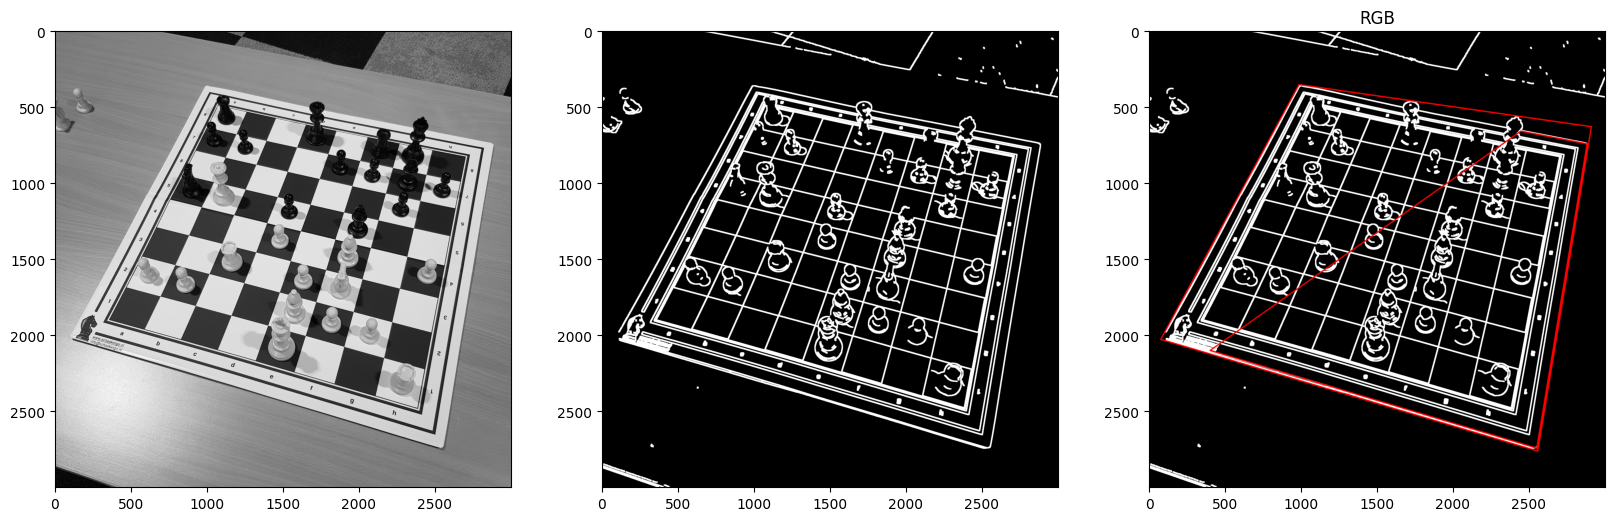

In [12]:
# Path of Image that you want to convert

# read image and convert it to different color spaces
image = cv2.imread(image_path)
resized = cv2.resize(image, (3000, 3000))

original_size = image.shape[0]
resized_size = 3000
parameters_original_size = 1000
upsize_factor = resized_size / original_size
scale_factor = resized_size / parameters_original_size

gray_image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
blur_sigma = math.sqrt((upsize_factor // 2)*(5**2))
# blurred_image = cv2.GaussianBlur(gray_image, (5,5),blur_sigma)
# blurred_image = cv2.bilateralFilter(blurred_image,9,75,75)
blurred_image = cv2.bilateralFilter(gray_image,9,75,75)
# blurred_image = cv2.addWeighted(blurred_image, 4, cv2.blur(blurred_image, (30, 30)), -4, 128)

thresh, _ = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# canny_image = cv2.Canny(blurred_image, ret * 1.5, ret * 0.75 * 1.5)
canny_image = cv2.Canny(blurred_image, thresh, thresh * 0.5)
canny_image = cv2.dilate(canny_image, np.ones((5,5)), iterations=2)
# canny_image = cv2.morphologyEx(canny_image, cv2.MORPH_OPEN, np.ones((5,5)), iterations=1)

board_contours, _ = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2BGR)
#cv2.drawContours(output_image, board_contours, -1, (255, 0, 0), 2)

# next, previous, child contour, parent contour
ext_board_contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def process_contours(index, hierarchy, cnts, min = 1_000_000, max = 4_000_000):
    output = []
    while index != -1:
        contour = cnts[index]
        area = cv2.contourArea(contour)
        # print(f"{index} {area}")

        # original 2_000_000
        if min < area < max:
            output.append((index,contour))

        child_index = hierarchy[index][2]
        if child_index != -1:
            output += process_contours(child_index, hierarchy, cnts, min, max)  # Process children first
        index = hierarchy[index][0]  # Move to the next contour

    return output

no_parent_contours = [x for x in enumerate(hierarchy[0]) if x[1][3] == -1]
candidates = []
for i, _ in no_parent_contours:
    output = process_contours(i, hierarchy[0], ext_board_contours, min=50_000*scale_factor, max=2_000_000*scale_factor)

    for i,cnt in output:
        approx = cv2.approxPolyN(cnt, 4, True)
        if approx.shape[0] != 1:
            continue

        approx = sort_quadrilateral_approx(approx[0])
        is_duplicate = False
        for candidate in candidates:
            is_duplicate = (
                np.allclose(approx[0], candidate[0])
                and np.allclose(approx[1], candidate[1])
                and np.allclose(approx[2], candidate[2])
                and np.allclose(approx[3], candidate[3])
            )
            if is_duplicate:
                break
        
        if is_duplicate:
            continue
        
        candidates.append(approx)
        (pt1, pt2, pt3, pt4) = approx
        cv2.line(output_image, pt1, pt2, (0, 0, 255), 7)
        cv2.line(output_image, pt2, pt3, (0, 0, 255), 7)
        cv2.line(output_image, pt3, pt4, (0, 0, 255), 7)
        cv2.line(output_image, pt1, pt4, (0, 0, 255), 7)

print("Ext board areas", [cv2.contourArea(ext_board_contours[i]) for i, _ in no_parent_contours])
# cv2.drawContours(output_image, [ext_board_contours[i] for i, _ in [no_parent_contours[28]]], -1, (0, 0, 255), thickness=2)

print("Candidates", len(candidates))
print(candidates)
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.subplot(2, 3, 2)
plt.imshow(canny_image, cmap="gray")
plt.subplot(2, 3, 3)
plt.imshow(output_image[:,:,::-1])
plt.title("RGB")

In [13]:
def find_best_squares_hough(images: list[cv2.typing.MatLike], scale_factor: float):
    best_valid_square_image = None
    best_valid_square_image_square_count = 0
    best_square_approx = []
    best_idx = None


    for idx, black_image in enumerate(images):
        current_valid_square_count = 0

        # Look for valid squares and check if squares are inside of board
        board_contours = []
        square_approx = []
        valid_squares_image = np.zeros_like(black_image)

        # find contours
        board_contours, _ = cv2.findContours(black_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # loop through contours and filter them by deciding if they are potential squares
        for contour in board_contours:
            if 4000*scale_factor < cv2.contourArea(contour) < 20000*scale_factor:
                # Approximate the contour to a simpler shape
                epsilon = 0.01 * cv2.arcLength(contour, True)
                approx = cv2.approxPolyDP(contour, epsilon, True)
                    
                if len(approx) == 4:
                    # 4 points of polygon
                    pts = [pt[0].tolist() for pt in approx]
                    (pt1, pt2, pt3, pt4) = sort_quadrilateral_approx(pts)

                    # find rectangle that fits 4 point 
                    x, y, w, h = cv2.boundingRect(contour)
                    # find center of rectangle 
                    center_x=(x+(x+w))/2
                    center_y=(y+(y+h))/2

                    # calculate length of 4 side of rectangle
                    l1 = math.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
                    l2 = math.sqrt((pt2[0] - pt3[0])**2 + (pt2[1] - pt3[1])**2)
                    l3 = math.sqrt((pt3[0] - pt4[0])**2 + (pt3[1] - pt4[1])**2)
                    l4 = math.sqrt((pt1[0] - pt4[0])**2 + (pt1[1] - pt4[1])**2)

                    # Create a list of lengths
                    lengths = [l1, l2, l3, l4]
                    
                    # Get the maximum and minimum lengths
                    max_length = max(lengths)
                    min_length = min(lengths)

                    # Check if this length values are suitable for a square , this threshold value plays crucial role for squares ,  
                    if (max_length - min_length) <= 50 * scale_factor: # 20 for smaller boards  , 50 for bigger , 35 works most of the time 
                        valid_square=True
                    else:
                        valid_square=False

                    if valid_square:
                        current_valid_square_count += 1 

                        square_approx.append(approx)

                        # Draw only valid squares to "valid_squares_image"
                        cv2.line(valid_squares_image, pt1, pt2, (255, 255, 0), 7)
                        cv2.line(valid_squares_image, pt2, pt3, (255, 255, 0), 7)
                        cv2.line(valid_squares_image, pt3, pt4, (255, 255, 0), 7)
                        cv2.line(valid_squares_image, pt1, pt4, (255, 255, 0), 7)

        if current_valid_square_count >= best_valid_square_image_square_count:
            best_valid_square_image = valid_squares_image
            best_valid_square_image_square_count = current_valid_square_count
            best_square_approx = square_approx
            best_idx = idx

    return (
        best_valid_square_image,
        best_valid_square_image_square_count,
        best_square_approx,
        best_idx
    )


def find_best_fitting_enclosing_square(image: cv2.typing.MatLike):
    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, np.ones((5,5)), iterations=3)
    contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None

    cnt = max(contours, key=cv2.contourArea)
    best_fitting_square = cv2.approxPolyN(cnt, 4)

    # Initialize variables to store extreme points
    return sort_quadrilateral_approx(best_fitting_square[0])

Candidati 2


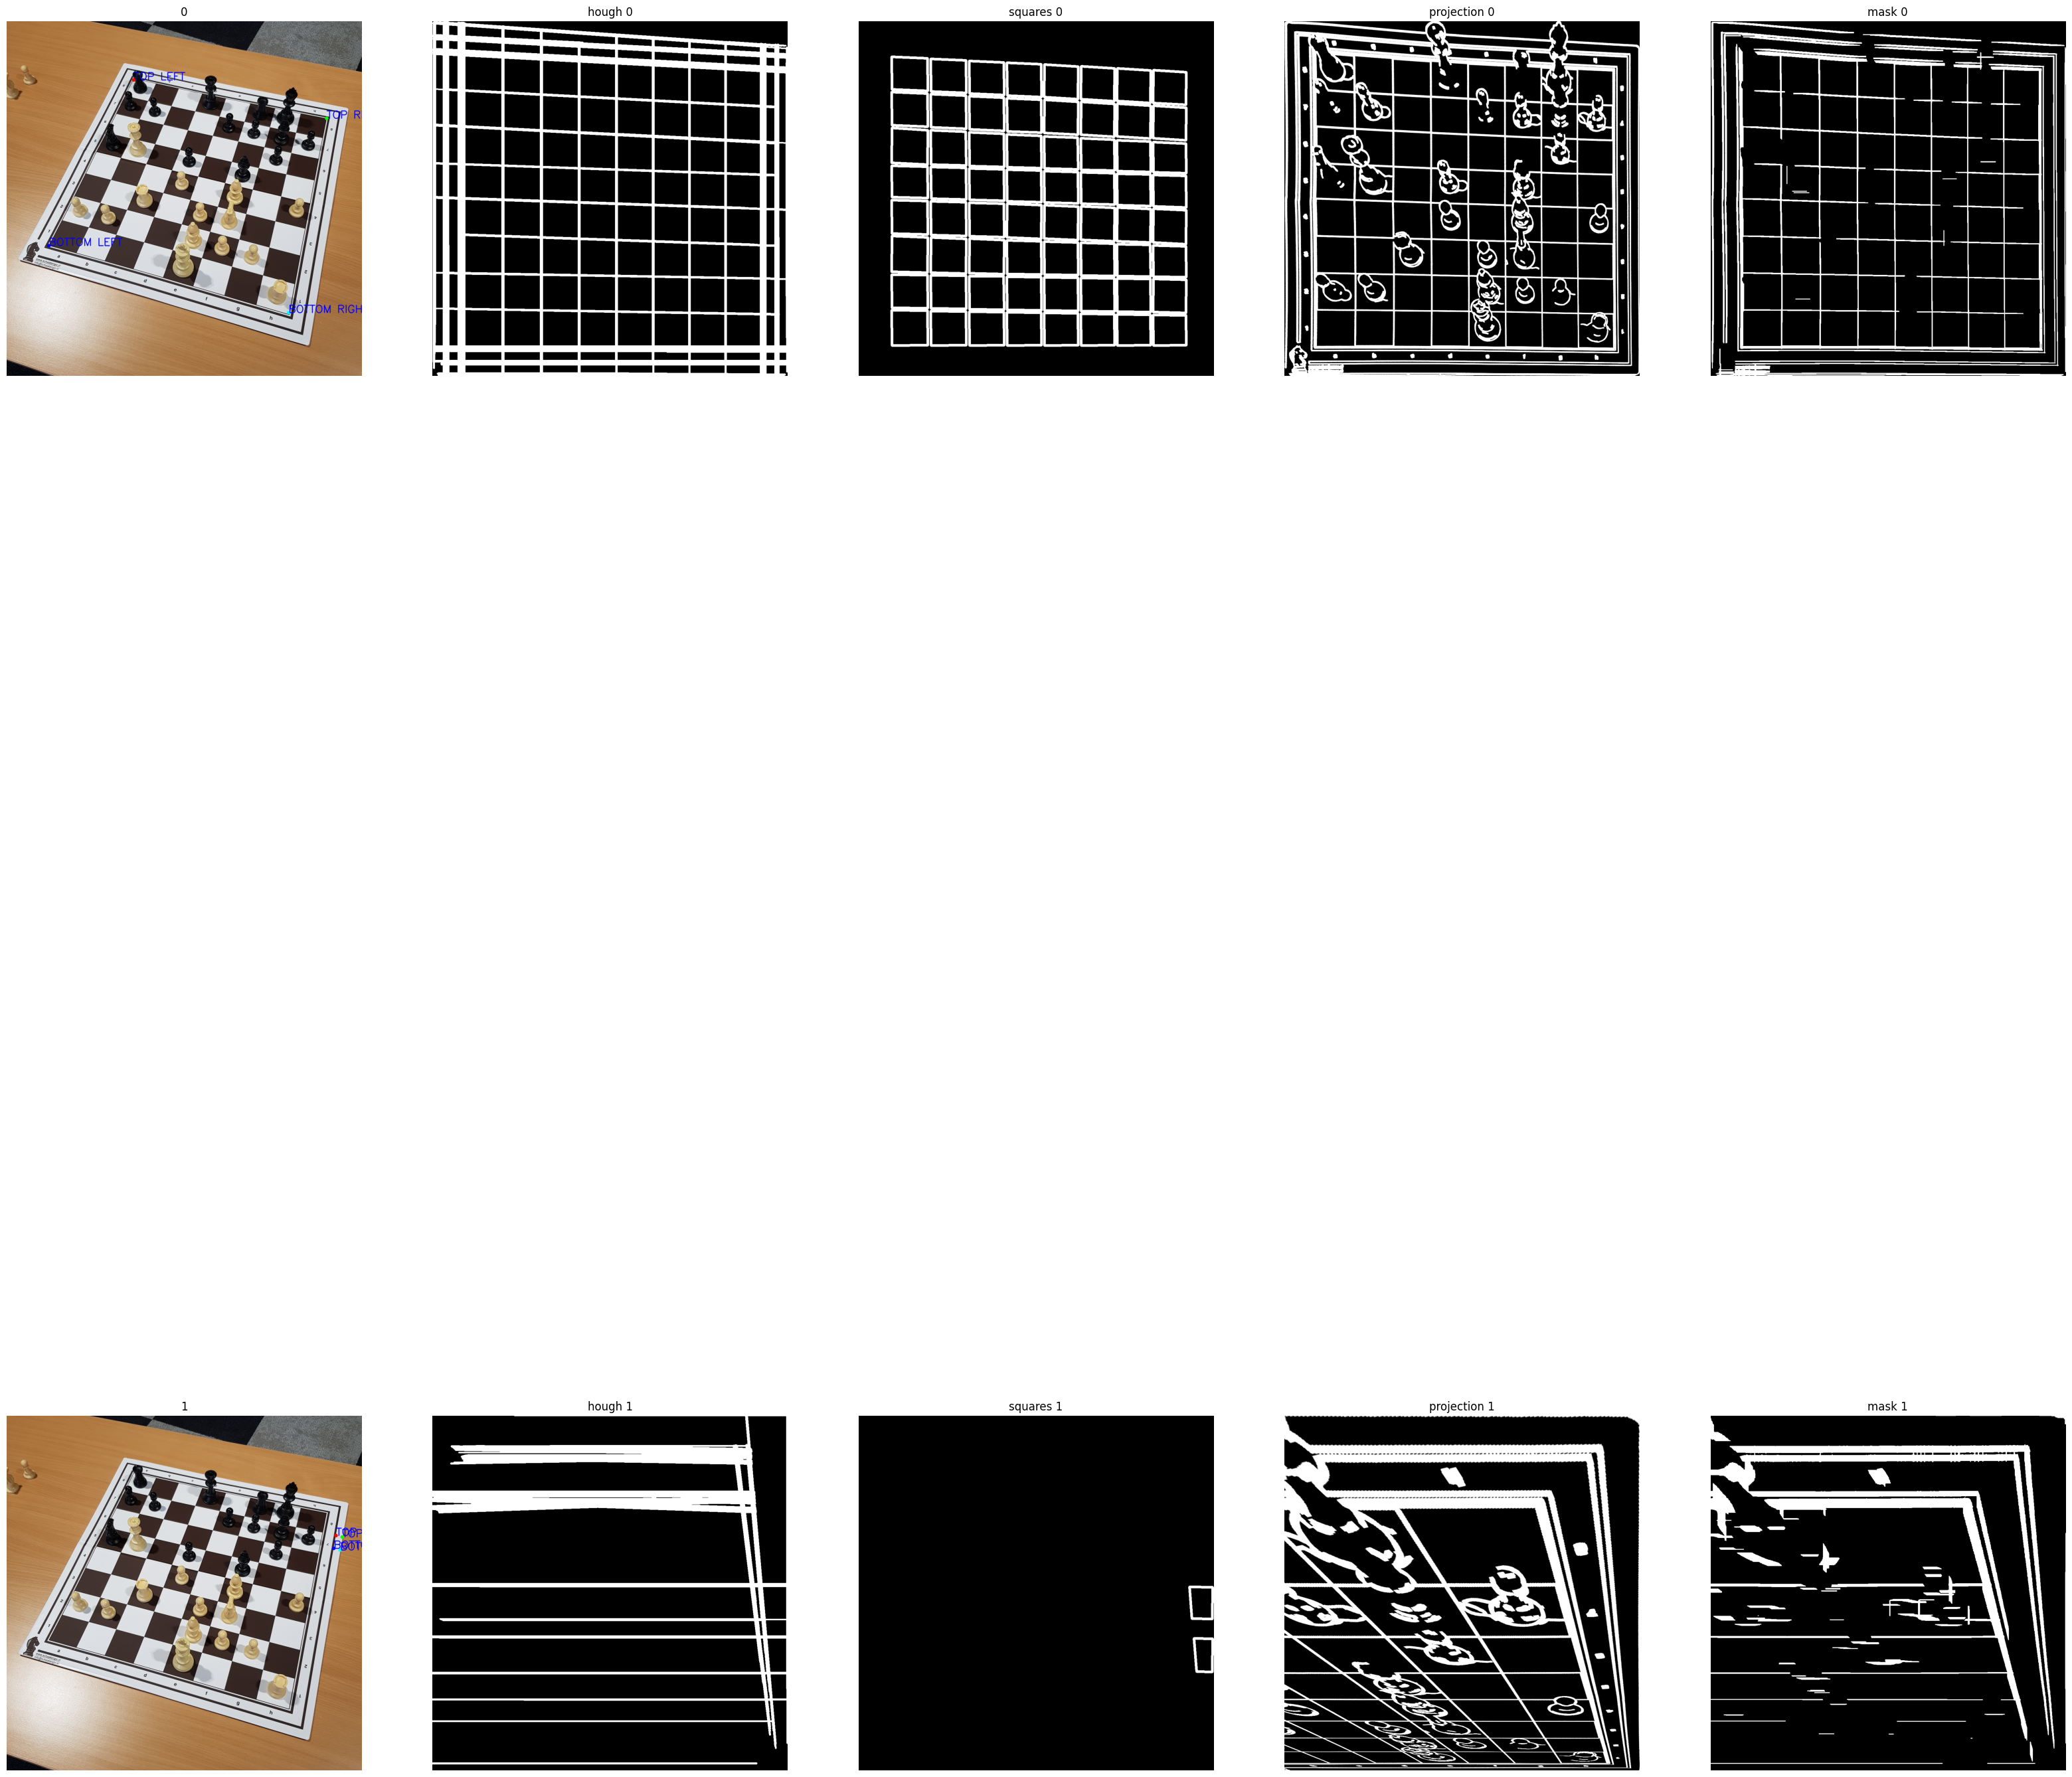

In [14]:
threshold = 0
width, height = (1200, 1200)
corners_list = [np.float32([candidate[2], candidate[1], candidate[3], candidate[0]]) for candidate in candidates]
plot_width = 5
plot_height = len(corners_list)


dst_pts = np.float32([
    [threshold, threshold], 
    [width + threshold, threshold], 
    [threshold, height + threshold], 
    [width + threshold, height + threshold]
])

print("Candidati", len(candidates))
plt.figure(figsize=(10 * plot_height * 2, 10 * plot_width))
final_candidates = []
for candidate_idx, corners in enumerate(corners_list):
    # Compute the perspective transform matrix
    M = cv2.getPerspectiveTransform(corners, dst_pts)
    M_inv = cv2.invert(M)[1]  # Get the inverse of the perspective matrix

    working_image = cv2.warpPerspective(canny_image, M, (width, height), flags=cv2.INTER_LINEAR)

    # hough_dilation_kernel = np.ones((3, 3), np.uint8)
    # lines = cv2.HoughLinesP(out, 1, np.pi / 180, threshold=500, minLineLength=150, maxLineGap=100)

    # out = cv2.cvtColor(out, cv2.COLOR_GRAY2BGR)
    # if lines is not None:
    #     for line in lines:
    #         x1, y1, x2, y2 = line[0]
    #         # draw only lines to the "black_image"
    #         cv2.line(out, (x1, y1), (x2, y2), (255, 0, 255), 3)

    # Detect horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
    horizontal_mask = cv2.morphologyEx(working_image, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)

    # Detect vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))
    vertical_mask = cv2.morphologyEx(working_image, cv2.MORPH_OPEN, vertical_kernel, iterations=1)
    table_mask = cv2.bitwise_or(horizontal_mask, vertical_mask)
    table_mask = cv2.morphologyEx(table_mask, cv2.MORPH_OPEN, np.ones((3,3)), iterations=1)

    ##### 
    mask_image = np.zeros_like(working_image)
    mask_image[np.where(table_mask==255)] = 255

    # hough_dilation_kernel = np.ones((3, 3), np.uint8)
    lines = cv2.HoughLinesP(mask_image, 1, np.pi / 180, threshold=300, minLineLength=width*0.1, maxLineGap=width*0.5)

    hough_image = np.zeros_like(mask_image)
    tolerance = np.pi / 18 # 10 degrees
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]

            angle_radians = np.arctan2(y2 - y1, x2 - x1)  
            normalized_angle = abs(angle_radians % np.pi)  # Normalize angle to [0, π]
            if (normalized_angle <= tolerance or abs(normalized_angle - np.pi) <= tolerance) or abs(normalized_angle - np.pi / 2) <= tolerance:
                cv2.line(hough_image, (x1, y1), (x2, y2), (255, 0, 255), 3)


    out = resized.copy()
    best_valid_square_image,best_squares_number,_,_ = find_best_squares_hough([hough_image], hough_image.shape[0] / parameters_original_size)
    corners = find_best_fitting_enclosing_square(best_valid_square_image)
    if corners is not None:
        #chessboard_approx = cv2.approxPolyN(max_external_contours, 4, False, ensure_convex=True)
        corners = np.array([(corners[2], corners[1], corners[3], corners[0])], dtype=np.float32)
        M_inv = cv2.invert(M)[1]
        corners_original = cv2.perspectiveTransform(corners, M_inv)

        # print(corners_original.shape, corners_original[0].shape, corners_original)
        corners_original_draw = corners_original.astype(int)
        corners_original_draw = [corners_original_draw[0][0], corners_original_draw[0][1], corners_original_draw[0][2], corners_original_draw[0][3]]

        final_candidates.append((corners_original, best_valid_square_image_square_count))
        final_candidates.append((corners_original, best_squares_number, hough_image, best_valid_square_image))

        #### OUTPUT
        cv2.circle(out, corners_original_draw[0], 15, (0, 0, 255), -1)  # blue for top-left
        cv2.circle(out, corners_original_draw[1], 15, (0, 255, 0), -1)  # green for top-right
        cv2.circle(out, corners_original_draw[2], 15, (255, 0, 0), -1)  # red for bottom-left
        cv2.circle(out, corners_original_draw[3], 15, (255, 255, 0), -1)  # yellow for bottom-right
        

        cv2.putText(out, "TOP LEFT", corners_original_draw[0], cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 5, cv2.LINE_AA)
        cv2.putText(out, "TOP RIGHT", corners_original_draw[1], cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 5, cv2.LINE_AA)
        cv2.putText(out, "BOTTOM LEFT", corners_original_draw[2], cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 5, cv2.LINE_AA)
        cv2.putText(out, "BOTTOM RIGHT", corners_original_draw[3], cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 5, cv2.LINE_AA)

    plt.subplot(plot_height, plot_width, candidate_idx*plot_width + 1)
    plt.imshow(out[:,:,::-1])
    plt.title(f"{candidate_idx}")
    plt.axis('off')
    plt.subplot(plot_height, plot_width, candidate_idx*plot_width + 2)
    plt.imshow(hough_image, cmap="gray")
    plt.title(f"hough {candidate_idx}")
    plt.axis('off')
    plt.subplot(plot_height, plot_width, candidate_idx*plot_width + 3)
    plt.imshow(best_valid_square_image, cmap="gray")
    plt.title(f"squares {candidate_idx}")
    plt.axis('off')
    plt.subplot(plot_height, plot_width, candidate_idx*plot_width + 4)
    plt.imshow(working_image, cmap="gray")
    plt.title(f"projection {candidate_idx}")
    plt.axis('off')
    plt.subplot(plot_height, plot_width, candidate_idx*plot_width + 5)
    plt.imshow(mask_image, cmap="gray")
    plt.axis('off')
    plt.title(f"mask {candidate_idx}")

## TEST TROVARE QUADRATI

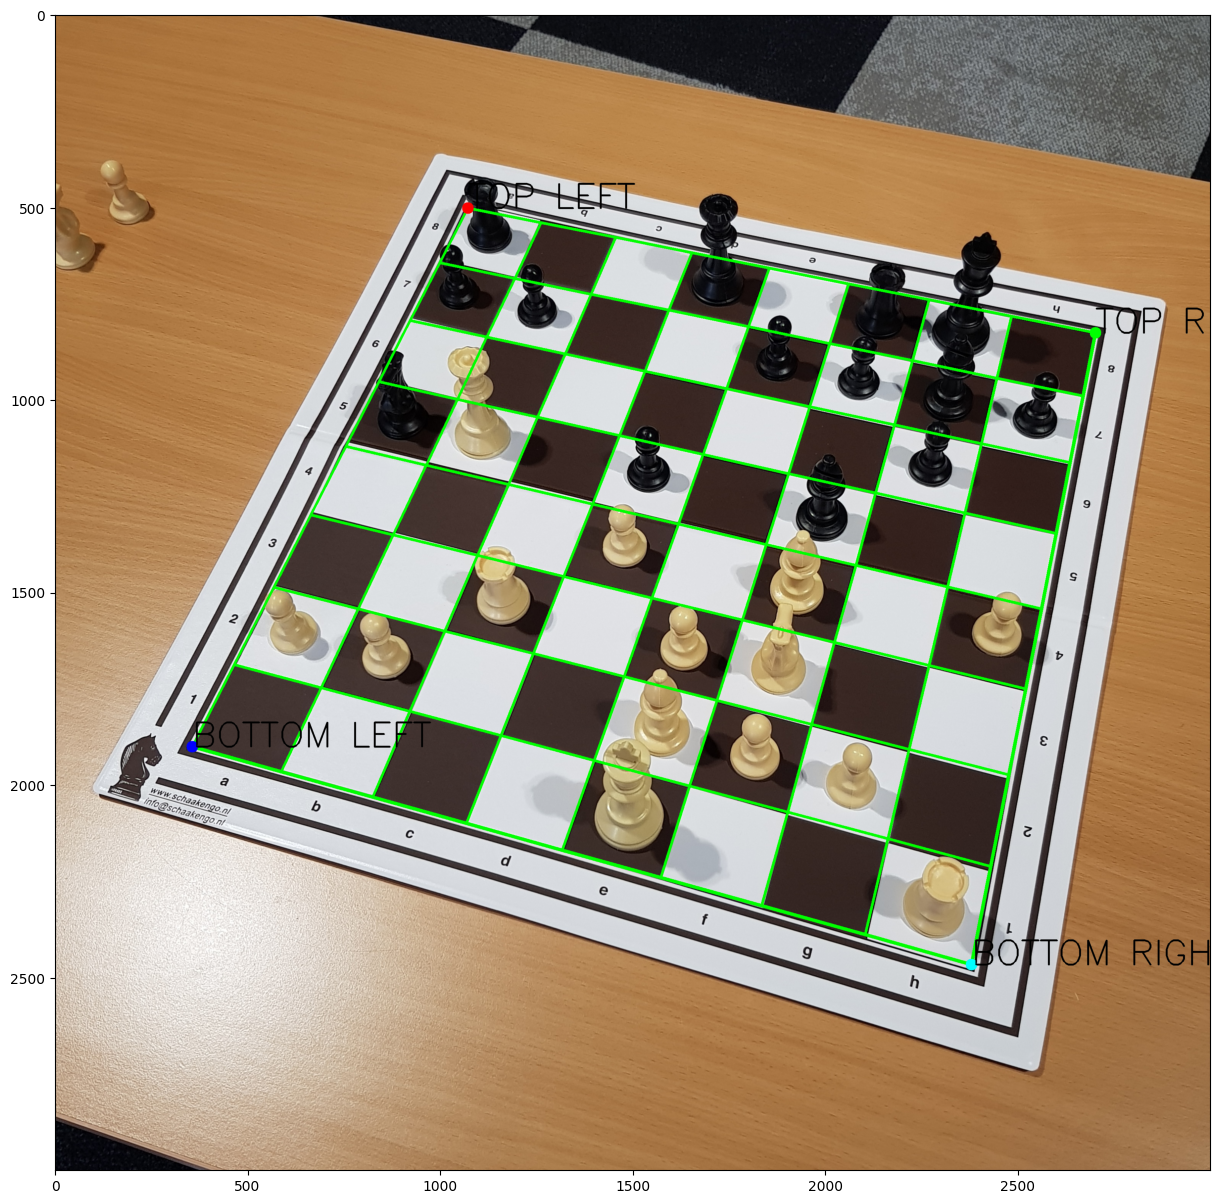

In [15]:
chessboard_rows, chessboard_cols = 8, 8  # 8x8 chessboard
def find_chessboard_squares(corners, threshold = 0, size = (1200, 1200)):
    '''
    :param corners (top_left, top_right, bottom_left, bottom_right)
    :param threshold extra space on all sides
    :param size tuple
    '''
    width, height = size 

    # Define the destination points (shifted by 'threshold' on all sides)
    dst_pts = np.float32([
        [threshold, threshold], 
        [width + threshold, threshold], 
        [threshold, height + threshold], 
        [width + threshold, height + threshold]
    ])

    # Compute the perspective transform matrix
    M = cv2.getPerspectiveTransform(corners, dst_pts)
    M_inv = cv2.invert(M)[1]  # Get the inverse of the perspective matrix

    # Calculate the width and height of each square in the warped image
    square_width = width // chessboard_cols
    square_height = height // chessboard_rows

    # List to store squares' data in the correct order (bottom-left first)
    squares_data_warped = []
    for i in range(chessboard_rows - 1, -1, -1):  # Start from bottom row and move up
        for j in range(chessboard_cols):  # Left to right order
            # Define the 4 corners of each square
            top_left = (j * square_width, i * square_height)
            top_right = ((j + 1) * square_width, i * square_height)
            bottom_left = (j * square_width, (i + 1) * square_height)
            bottom_right = ((j + 1) * square_width, (i + 1) * square_height)

            # Calculate center of the square
            x_center = (top_left[0] + bottom_right[0]) // 2
            y_center = (top_left[1] + bottom_right[1]) // 2

            # Append to list in the correct order
            squares_data_warped.append([
                (x_center, y_center),
                bottom_right,
                top_right,
                top_left,
                bottom_left
            ])

    # Convert to numpy array for transformation
    squares_data_warped_np = np.array(squares_data_warped, dtype=np.float32).reshape(-1, 1, 2)

    # Transform all points back to the original image
    squares_data_original_np = cv2.perspectiveTransform(squares_data_warped_np, M_inv)

    # Reshape back to list format
    squares_data_original = squares_data_original_np.reshape(-1, 5, 2)  # (num_squares, 5 points, x/y)
    return squares_data_original

def draw_chessboard_corners(corners, image, text_color = (0, 0, 0)):
    corners = corners.astype(int)
    cv2.circle(image, corners[0], 15, (0, 0, 255), -1)  # blue for top-left
    cv2.circle(image, corners[1], 15, (0, 255, 0), -1)  # green for top-right
    cv2.circle(image, corners[2], 15, (255, 0, 0), -1)  # red for bottom-left
    cv2.circle(image, corners[3], 15, (255, 255, 0), -1)  # yellow for bottom-right

    cv2.putText(image, "TOP LEFT", corners[0], cv2.FONT_HERSHEY_SIMPLEX, 3, text_color, 2, cv2.LINE_AA)
    cv2.putText(image, "TOP RIGHT", corners[1], cv2.FONT_HERSHEY_SIMPLEX, 3, text_color, 2, cv2.LINE_AA)
    cv2.putText(image, "BOTTOM LEFT", corners[2], cv2.FONT_HERSHEY_SIMPLEX, 3, text_color, 2, cv2.LINE_AA)
    cv2.putText(image, "BOTTOM RIGHT", corners[3], cv2.FONT_HERSHEY_SIMPLEX, 3, text_color, 2, cv2.LINE_AA)
    return image

def draw_chessboard_squares(image: cv2.typing.MatLike, squares, corners, color=(0,255,0), text_color = (0, 0, 0), thickness=8):
    for idx, square in enumerate(squares):
        x_center, y_center = tuple(map(int, square[0]))  # Convert to int

        bottom_right = tuple(map(int, square[1]))
        top_right = tuple(map(int, square[2]))
        top_left = tuple(map(int, square[3]))
        bottom_left = tuple(map(int, square[4]))

        # Draw necessary lines only (to form grid)
        cv2.line(image, top_left, top_right, (0, 255, 0), 6)  # Top line
        cv2.line(image, top_left, bottom_left, (0, 255, 0), 6)  # Left line

        # Draw bottom and right lines only for last row/column
        i = idx // chessboard_rows
        j = idx % chessboard_cols

        if idx % chessboard_cols == chessboard_cols - 1:
            cv2.line(image, top_right, bottom_right, (0, 255, 0), 8)  # Right line
        if i == 0:
            cv2.line(image, bottom_left, bottom_right, (0, 255, 0), 8)  # Bottom line

        if corners is not None:
            # Mark the extreme points
            draw_chessboard_corners(corners, image, text_color)


def find_best_chessboard_polygon(contours, image_width, image_height):
    """
    Finds the best polygon based on squareness and centeredness.

    :param contours: List of contours, where each contour is an array of points.
    :param image_width: Width of the image (used for determining center).
    :param image_height: Height of the image (used for determining center).
    :return: The best contour or None if no suitable polygon is found.
    """
    best_polygon = None
    best_score = float('inf')  # Lower score is better
    best_idx = None

    image_center = np.array([image_width / 2, image_height / 2])

    for i, (approx, n_squares) in enumerate(contours):
        # Check for squareness
        square_score = 0
        for i in range(4):
            # Calculate the lengths of all sides
            side_a = np.linalg.norm(approx[i][0] - approx[(i + 1) % 4][0])
            side_b = np.linalg.norm(approx[(i + 1) % 4][0] - approx[(i + 2) % 4][0])
            angle_cosine = np.dot(
                approx[i][0] - approx[(i - 1) % 4][0],
                approx[(i + 1) % 4][0] - approx[i][0]
            ) / (side_a * side_b)

            square_score += abs(1 - abs(angle_cosine))  # Penalize non-right angles

        # Check for centeredness
        # polygon_center = np.mean(approx[:, 0], axis=0)
        # center_score = np.linalg.norm(polygon_center - image_center)

        # Check for number of squares
        squares_number_score = (64 - n_squares if n_squares <= 64 else (n_squares - 64)*2)*100

        # Combine scores
        # total_score = square_score + center_score + squares_number_score
        total_score = square_score + squares_number_score

        if total_score < best_score:
            best_score = total_score
            best_polygon = approx
            best_index = i

    return i, best_polygon

polygons = [(x[0].reshape(4, 2), x[1]) for x in final_candidates]
i, best_square = find_best_chessboard_polygon(polygons, resized.shape[1], resized.shape[0])

square_image = resized.copy()
squares = find_chessboard_squares(best_square.reshape(1, 4, 2))
draw_chessboard_squares(square_image, squares, best_square.astype(int), (255, 0, 255))

plt.figure(figsize=(20,15))
plt.imshow(square_image[:,:,::-1])